# Microstates versus Macrostates

Imagine we have some  dipoles in a magnetic field. Each dipole contributes an interaction energy of $- \mu \cdot B$. Quantum mechanics tells us that there are only specific orientations of the dipole in the magnetic field allowed. This is simplest when the dipoles possess angular momentum of $\hbar/2$, which is referred to as "spin 1/2".

The dipoles can thus line up in one of two directions: parallel, or anti-parallel to the magnetic field. This leads to an interaction energy of $\mp \mu B$ per dipole. Imagine now we have $N$ dipoles. If $n$ are oriented parallel to the field, then $(N-n)$ must be anti-parallel. Thus, the total energy of the system is given by:

$$
    E(n) = n(-\mu B)+(N-n)(\mu B) = (N-2n)\mu B
$$

This means that if we have $N=9$, and $n=7$, we would have an interaction energy of $-6\mu B$. So why is this interesting

Well, consider examples A and B below. The both have two dipoles which are oriented anti-parallel to the magnetic field, while the other 7 are all in alignment. From a microscopic point of view, the two scenarios are different, as the individual atoms which are anti-parallel are different in both cases. However, from a macroscopic point of view, the interaction energy of both with the magnetic field (which is what we can measure) are the same. These means that a **given macrostate can be described by a large number of equally likely of microstates**.

![B_field_dipoles](Figures/B_Field_Dipoles.png)

For the above example, there are $2^N$ microstates. The number of microstates which can give the same interaction energy $E(n)$ is
$$
    \Omega(n) = \frac{N!}{n!(N-n)!}
$$
This is referred to as the statistical weight. It's worth considering exactly what it means - see Section 1.4 of Blundell & Blundell for a more robust discussion of where this term comes from. For the moment, the below plot shows the statistical weight for our above toy problem, where we vary n.

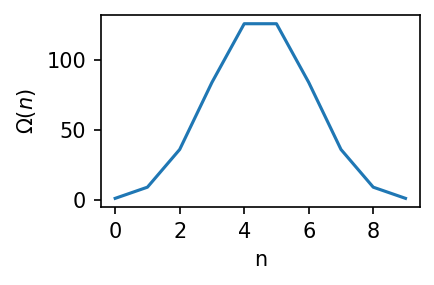

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def stat_weight(n,N):
    return np.math.factorial(int(N))/(np.math.factorial(n)*np.math.factorial(int(N-n)))

N = 9.0
n = np.arange(0,9.1,1)
omega = np.zeros_like(n)
for i in n:
    omega[int(i)] = stat_weight(i,N)
plt.figure(figsize=[3,2],dpi=150)
plt.plot(n,omega)
plt.xlabel("n")
plt.ylabel("$\Omega (n)$")
plt.tight_layout()
plt.savefig("Figures/Stat_weight.png")
plt.show()

What this shows us is that the statistical weight is highest for when $n$ is between 4 and 5. This should make sense as this is when half of the dipoles are oriented parallel to the B field, and half anti-parallel, and so we have the most freedom with placing them in the grid. This also means that the macrostate given by $n=4/5$ is the most probable state to occur, as these macrostates have the largest number of microstates.

# Temperature

We can now use the above expresssion for statistical weight to arrive at a defintion of the temperature of an object. First, let's consider 2 bodies which are in thermal contact.

![Stat_Weight](Figures/Temperature_Statistical_Weight.png)

For the following, we are going to assume that this is a closed system (that is, we're not losing any energy to the surroundings) and so, at all times, the total energy of the system is given by $E=E_1+E_2$. As such, all we need to do is specify $E_1$ and the macrostate of the system will be determined. 
The first system can be in any one of $\Omega_1(E_1)$ microstates and the second system can be in any one of $\Omega_2(E_2)$ microstates. Thus, the system as a whole can be in any number of $\Omega_1(E_1) \Omega_2(E_2)$ microstates.

Now, if we let the system reach thermal equilibrium, then the system will appear to be in the macrostate which maximises the number of microstates (consider the above graph to convince yourself of this). As such, the most probable division of energy between the two systems is the one which maximises $\Omega_1(E_1) \Omega_2(E_2)$. So we end up with
$$
\frac{{\rm d}}{{\rm d}E_1} \left(\Omega_1(E_1) \Omega_2(E_2)\right) = 0
$$
This gives
$$
\Omega_2(E_2) \frac{{\rm d} \Omega_1(E_1) }{{\rm d}E_1} + \Omega_1(E_1) \frac{{\rm d} \Omega_2(E_2) }{{\rm d}E_2} \frac{{\rm d} E_2 }{{\rm d}E_1} = 0
$$
Now recalling that $E=E_1+E_2$ and is fixed gives ${\rm d}E_1=-{\rm d}E_2$, which in turn gives $\frac{{\rm d}E_1}{{\rm d}E_2}=-1$. This simplifies our above expression to
$$
\frac{1}{\Omega_1} \frac{{\rm d} \Omega_1}{{\rm d} E_1} - \frac{1}{\Omega_2} \frac{{\rm d} \Omega_2}{{\rm d} E_2} = 0
$$
from which we get
$$
    \frac{{\rm d ln} \Omega_1}{{\rm d} E_1} = \frac{{\rm d ln} \Omega_2}{{\rm d} E_2}
$$
This condition defines the most likely division of energy between the objects which we would call "being at the same temperature". As such, we can now define
$$
    \frac{1}{k_{\rm B}T} = \frac{{\rm d ln} \Omega}{{\rm d} E}
$$
where the choice of $k_{\rm B}T$ will be motivated later.

# The Boltzmann Distribution

Ok, now let's consider the above example again. However, we're going to change one of the systems such that it acts as a reservoir (or heat bath). We then place the other system into the reservoir. The reservoir has such an enormour amount of energy compared to the system that any change in its temperature as it heats the smaller system is completely negligible.

![Reservoir](Figures/Reservoir.png)

Now, we're going to assume that for each energy of the system, there is only a single allow microstate. As such, $\Omega(\epsilon)=1$.

So, the probability that the system has energy $\epsilon$ is proportional to the number of microstates of the reservoir times the number of microstates of the system:
$$
    P(\epsilon) \propto \Omega(E-\epsilon)\Omega(\epsilon)=\Omega(E-\epsilon)
$$
Now using
$$
    \frac{1}{k_{\rm B}T} = \frac{{\rm d ln} \Omega}{{\rm d} E}
$$
and given that $\epsilon \ll E$, we can Taylor expand ${\rm ln} \Omega$ around 0 to give
$$
    {\rm ln} \Omega(E-\epsilon) = {\rm ln} \Omega(E) - \frac{{\rm d ln} \Omega(E)}{{\rm d} E}\epsilon + ...
$$
which gives
$$
    {\rm ln} \Omega(E-\epsilon) = {\rm ln} \Omega(E) - \frac{\epsilon}{k_{\rm B} T} + ...
$$
This then gives
$$
    \Omega(E-\epsilon) = \Omega(E){\rm e}^{-\frac{\epsilon}{k_{\rm B} T}}
$$
Finally, this gives
$$
    P(\epsilon) \propto {\rm e}^{-\frac{\epsilon}{k_{\rm B} T}}
$$
This probability tells us how the system reacts to being placed in the bath. There is a high probability that the system will achieve an energy $\epsilon$ which is less than ${k_{\rm B} T}$, but it quickly decays above this energy, meaning we are unlikely to observe the system to have an energy much higher than the reservoir. Now, to normalise the probability, we must divide by all possible microstates:
$$
    P(E_r) = \frac{{\rm e}^{-E_r/k_{\rm B} T}}{\sum_i {\rm e}^{-E_i/k_{\rm B} T}}
$$
This is known as the **Boltzmann distribution**. It is also written as 
$$
    P(E_r) = \frac{1}{Z}{\rm e}^{-\beta E_r}
$$
where
$$
    Z = \sum_i {\rm e}^{-\beta E_i}
$$
is  called the **partition function**.
In deriving this, we have assumed that every energy has a single microstate which describes it. This is not necessarily true, and so we can modify the equations above to be
$$
    P(E_r) = \frac{1}{Z}g(E_r){\rm e}^{-\beta E_r}
$$
$$
    Z = \sum_{E_i} g(E_i) {\rm e}^{-\beta E_i}
$$
where we are now summing over energies instead of microstates. $g(E_i)$ is then the number of microstates possessing energy $E_i$. It is called the degeneracy of the energy eigenvalue $E_i$, and will come up in quantum mechanics.

Finally, it's useful to note that $1/k_{\rm B} T$ comes up a lot in statistical mechanics. As such, it's often simply written as
$$
    \beta \equiv \frac{1}{k_{\rm B} T}
$$
to save time.

# Some final definitions

Right, we need a few final terms before we can move on.

**Thermal equilibrium** : A system is in thermal equilibrium when its macroscopic properties have ceased to change with time.

**Functons of state** : Any physical quanitity that has a well defined value for each equilibrium state of a system. For example: Pressure, temperature, volume. In mathematical terms, these are exact differentials.

Work put into a system and total heat put into or out of a system are thus **not** functions of state. They are inexact differentials.

As a nice example, consider warming up your hands. If you change the temperature of your hands, they achieve an equilibrium state with a given temperature, independant of how you managed to get them to this temperature. That is, you could rub them together (performing work on them) or sinking them into a tub of hot water (adding heat to them).

In this course, we will endeavour to write exact differentials as ${\rm d} T$, and inexact differentials as đQ. However, some times latex doesn't work with this symbol, so always check one of the course books to be sure whether an equation involves an exact or an inexact differential.

**Equation of state**: An equation of state links together functions of state. For example, $P V = N k_{\rm B} T$ is the equation of state of an Ideal Gas.

# The First Law of Thermodynamics

So, now we are in a position to state the first law of thermodynamics, which says:

**The first law of thermodynamics**
Energy is conserved, and heat and work are both forms of energy.

This was shown experimentally by Joule, who changed the temperature of a mass of water in two ways: rotating a paddle through it, and by placing a heating element in it, and for a fixed temperature change, found that the energy from both methods was the same.

Mathmatically, we can right the first law as 
$$
    \Delta U = \Delta Q + \Delta W.
$$
That is, the change in internal energy of a system, $\Delta U$, is equal to the the sum of the heat supplied to the system $\Delta Q$ and the work done on the system $\Delta W$. Writing it for differential changes gives

$$ 
    {\rm d U} = {\rm d}Q +  {\rm d}W.
$$